# Homework 03 Till Meineke


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mutual_info_score,
    accuracy_score,
    root_mean_squared_error,
)  # mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

## Dataset


In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

Or you can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
```

We need to take `bank/bank-full.csv` file from the downloaded zip-file.
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not.


### Additional Variable Information

**Input variables - bank client data:**

1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")

**related with the last contact of the current campaign:**

9. contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)

**other attributes:**

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Output variable (desired target):**

17. y - has the client subscribed a term deposit? (binary: "yes","no")


In [3]:
# URL = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"

# !wget $URL -O ./data/bank+marketing.zip
# !unzip ./data/bank+marketing.zip -d ./data
# !unzip ./data/bank.zip -d ./data

In [4]:
df = pd.read_csv("./data/bank-full.csv", sep=";")
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Features


For the rest of the homework, you'll need to use only these columns:

`age`,
`job`,
`marital`,
`education`,
`balance`,
`housing`,
`contact`,
`day`,
`month`,
`duration`,
`campaign`,
`pdays`,
`previous`,
`poutcome`,
`y`


## Data preparation


- Select only the features from above.


In [7]:
columns = [
    "age",
    "job",
    "marital",
    "education",
    "balance",
    "housing",
    "contact",
    "day",
    "month",
    "duration",
    "campaign",
    "pdays",
    "previous",
    "poutcome",
    "y",
]

data = df[columns]
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,58,44,33,47,33,35,28,42,58,43
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician
marital,married,single,married,married,single,married,single,divorced,married,single
education,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary,secondary
balance,2143,29,2,1506,1,231,447,2,121,593
housing,yes,yes,yes,yes,no,yes,yes,yes,yes,yes
contact,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5,5,5,5,5,5
month,may,may,may,may,may,may,may,may,may,may
duration,261,151,76,92,198,139,217,380,50,55


In [8]:
data.nunique()

age            77
job            12
marital         3
education       4
balance      7168
housing         2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

- Check if the missing values are presented in the features.


In [9]:
data.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Question 1


What is the most frequent observation (mode) for the column `education`?


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df.describe(include="O")

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [12]:
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [13]:
print(
    "The most frequent observation (mode) for the `education` column is: "
    + str(df["education"].mode()[0])
)

The most frequent observation (mode) for the `education` column is: secondary


## Question 2


Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.


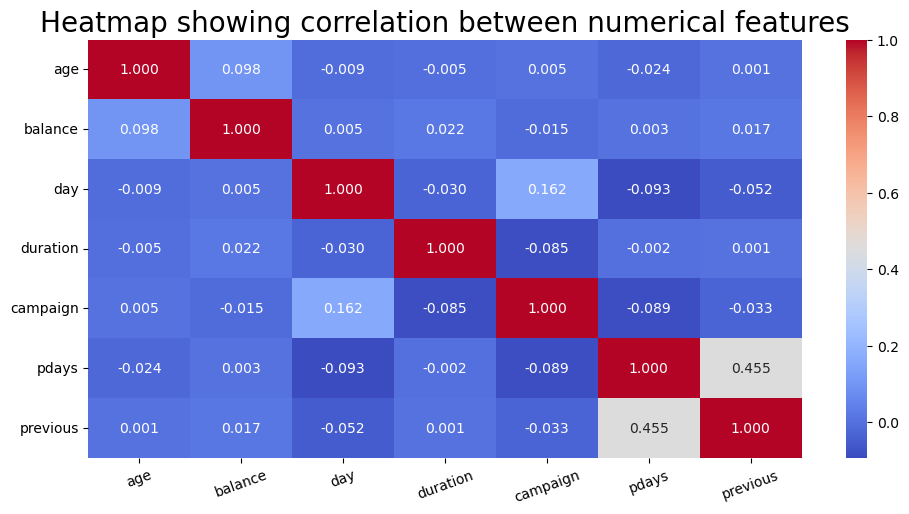

In [14]:
num_features = [
    "age",
    "balance",
    "day",
    "duration",
    "campaign",
    "pdays",
    "previous",
]

corr = df[num_features].corr()
# plot as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f")
plt.xticks(rotation=20)
plt.tight_layout()
plt.title("Heatmap showing correlation between numerical features", fontsize=20)
plt.show();

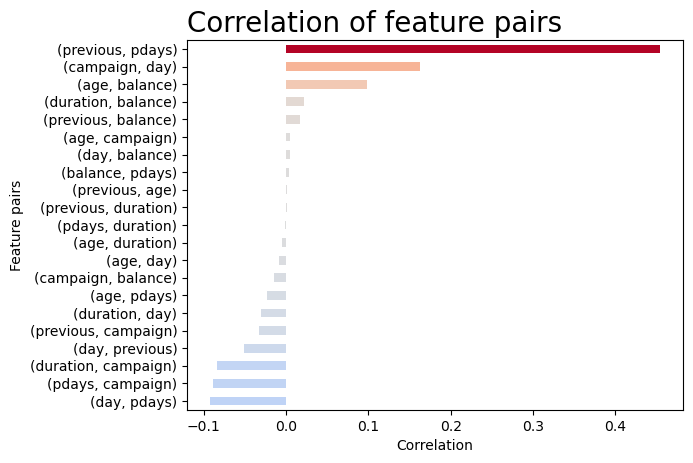

In [15]:
corr2 = df[num_features].corr().unstack().sort_values(ascending=True).drop_duplicates()
# drop age vs age correlation
corr2 = corr2.drop(corr2.index[-1])

# Normalize the correlation values
max_abs_corr = max(abs(corr2.min()), abs(corr2.max()))
norm = plt.Normalize(vmin=-max_abs_corr, vmax=max_abs_corr)

# Choose a colormap, e.g., coolwarm
cmap = plt.get_cmap("coolwarm")
# Generate colors based on the normalized correlation values
colors = cmap(norm(corr2.values))
# Plot the bar chart with the colormap
corr2.plot(kind="barh", color=colors)
plt.title("Correlation of feature pairs", loc="left", fontsize=20)
plt.xlabel("Correlation")
plt.ylabel("Feature pairs")
plt.show();

What are the two features that have the biggest correlation in this dataset?


In [16]:
print(
    f"""The two features that have the biggest correlation
in this dataset are:

{corr2.index[-1][1]} and {corr2.index[-1][0]}"""
)

The two features that have the biggest correlation
in this dataset are:

pdays and previous


### Target encoding


- Now we want to encode the `y` variable.
- Let's replace the values `yes`/`no` with `1`/`0`.


In [17]:
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [18]:
type(df["y"][0])

str

In [19]:
pd.set_option("future.no_silent_downcasting", True)

# replace the target column with 0 and 1
df["y"] = df["y"].replace({"no": 0, "yes": 1}).astype(int)
df["y"].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [20]:
type(df["y"][0])

numpy.int64

## Split the data


- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.


In [21]:
SEED = 42

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == len(df_train) + len(df_val) + len(df_test)

print(f"Size of the training set:\t {len(df_train)}")
print(f"Size of the validation set:\t {len(df_val)}")
print(f"Size of the test set:\t\t {len(df_test)}")

Size of the training set:	 27126
Size of the validation set:	 9042
Size of the test set:		 9043


In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train["y"].values
y_val = df_val["y"].values
y_test = df_test["y"].values

In [23]:
cat_features = [
    "job",
    "marital",
    "education",
    "housing",
    "contact",
    "month",
    "poutcome",
]

In [24]:
df_full_train.y.value_counts(normalize=True)

y
0    0.883931
1    0.116069
Name: proportion, dtype: float64

In [25]:
# In case of binary classification
global_subscription_rate = df_full_train.y.mean()
round(global_subscription_rate, 2)

0.12

In [26]:
for c in cat_features:
    print(c)
    df_group = df_full_train.groupby(c).y.agg(["mean", "count"])
    df_group["diff"] = df_group["mean"] - global_subscription_rate
    df_group["risk"] = df_group["mean"] / global_subscription_rate
    df_group.sort_values("risk", ascending=False, inplace=True)
    display(df_group)
    print()

job


,mean,count,diff,risk
job,,,,
student,0.278976,742,0.162906,2.403524
retired,0.222590,1815,0.106520,1.917727
unemployed,0.160313,1023,0.044243,1.381180
management,0.135467,7500,0.019397,1.167117
self-employed,0.122862,1286,0.006792,1.058518
admin.,0.119894,4137,0.003824,1.032947
unknown,0.111588,233,-0.004481,0.961390
technician,0.108760,6096,-0.007310,0.937024
housemaid,0.093812,1002,-0.022257,0.808243



marital


,mean,count,diff,risk
marital,,,,
single,0.147637,10221,0.031568,1.271973
divorced,0.119720,4143,0.003651,1.031451
married,0.100578,21804,-0.015492,0.866532



education


,mean,count,diff,risk
education,,,,
tertiary,0.148970,10539,0.032901,1.283460
unknown,0.127444,1483,0.011375,1.098001
secondary,0.105303,18670,-0.010767,0.907238
primary,0.086377,5476,-0.029693,0.744183



housing


,mean,count,diff,risk
housing,,,,
no,0.166407,16033,0.050337,1.433683
yes,0.075987,20135,-0.040082,0.654669



contact


,mean,count,diff,risk
contact,,,,
cellular,0.148270,23464,0.032200,1.277422
telephone,0.137128,2319,0.021059,1.181431
unknown,0.038613,10385,-0.077456,0.332675



month


,mean,count,diff,risk
month,,,,
mar,0.516043,374,0.399973,4.445983
sep,0.465517,464,0.349448,4.010678
dec,0.464481,183,0.348411,4.001749
oct,0.437396,599,0.321326,3.768396
apr,0.202645,2344,0.086576,1.745895
feb,0.156723,2112,0.040654,1.350256
aug,0.110954,4966,-0.005115,0.955932
nov,0.101481,3173,-0.014588,0.874315
jun,0.098888,4318,-0.017181,0.851976



poutcome


,mean,count,diff,risk
poutcome,,,,
success,0.641322,1210,0.525253,5.525332
other,0.170341,1497,0.054271,1.467575
failure,0.126891,3901,0.010821,1.093229
unknown,0.090392,29560,-0.025677,0.778779


## Question 3


- Calculate the mutual information score between `y` and other categorical variables in our dataset. Use the training set only.
- Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?


In [27]:
def calculate_mi(series):
    return mutual_info_score(series, df_train["y"])


df_mi = df_train[cat_features].apply(calculate_mi).round(2)
df_mi = df_mi.sort_values(ascending=False).to_frame(name="MI")

display(df_mi)

,MI
month,0.03
poutcome,0.03
job,0.01
housing,0.01
contact,0.01
marital,0.00
education,0.00


In [28]:
print(f"""The variable with the highest mutual information score is: {df_mi.iloc[0].name.replace("_", " ").capitalize()}
with a MI score of: {df_mi.iloc[0].values[0]}""")

The variable with the highest mutual information score is: Month
with a MI score of: 0.03


But `month` is not included in the list of possible answers. So, the correct answer is `poutcome`.


- Make sure that the target value `y` is not in your dataframe.


In [29]:
df_train = df_train.drop("y", axis=1)
df_val = df_val.drop("y", axis=1)
df_test = df_test.drop("y", axis=1)

assert "y" not in df_train.columns
assert "y" not in df_val.columns
assert "y" not in df_test.columns

## Question 4


- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.


In [30]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

- Fit the model on the training dataset.
  - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
  - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`


In [31]:
print(y_train.dtype)

int64


In [32]:
print(np.unique(y_train))

[0 1]


In [33]:
model = LogisticRegression(solver="liblinear", max_iter=1000, C=1.0, random_state=SEED)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.


In [34]:
val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [35]:
accuracy = accuracy_score(y_val, y_pred)

What accuracy did you get?


In [36]:
print(f"Accuracy = {accuracy}")

Accuracy = 0.8998009289980093


## Question 5


- Let's find the least useful feature using the _feature elimination_ technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.


In [37]:
features = df_train.columns.to_list()
features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [38]:
orig_score = accuracy
orig_score

0.8998009289980093

In [39]:
scores = pd.DataFrame(columns=["eliminated_feature", "accuracy", "difference"])

for c in features:
    subset = features.copy()
    subset.remove(c)

    train_dict = df_train[subset].to_dict(orient="records")

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(
        solver="liblinear", C=1.0, max_iter=1000, random_state=SEED
    )
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient="records")
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    # print(c, orig_score - score, score)
    scores.loc[len(scores)] = [c, score, np.abs(orig_score - score)]


In [40]:
scores = scores.sort_values("difference", ascending=False)
scores

,eliminated_feature,accuracy,difference
11,duration,0.890400,0.009401
15,poutcome,0.894492,0.005309
2,marital,0.900796,0.000995
7,loan,0.900575,0.000774
4,default,0.900464,0.000664
8,contact,0.900464,0.000664
1,job,0.900354,0.000553
0,age,0.900243,0.000442
5,balance,0.900133,0.000332
13,pdays,0.900133,0.000332


In [41]:
options = ["age", "balance", "marital", "previous"]

for opt in options:
    # if in options, pritn the feature and the difference
    print(f"Feature: {opt} \t Difference: {scores[scores.eliminated_feature == opt].difference.values[0]}")

Feature: age 	 Difference: 0.00044238000442375913
Feature: balance 	 Difference: 0.00033178500331776384
Feature: marital 	 Difference: 0.0009953550099535136
Feature: previous 	 Difference: 0.00033178500331776384


[claude.ai](https://claude.ai/chat/6b1f9d62-6dc3-4855-a9f7-33fd2b8e8796)

and dobble-check the results with [chatGPT](https://chatgpt.com/c/67099617-d30c-800d-b55f-32d701d13b02)


In [40]:
original_score = accuracy
# Assuming df_train, df_val, y_train, y_val, SEED, and original_score are defined

features = ["age", "balance", "marital", "previous"]  # Focus on these features
scores = pd.DataFrame(columns=["eliminated_feature", "accuracy", "difference"])

# Fit DictVectorizer on full training set once
full_dv = DictVectorizer(sparse=False)
full_train_dict = df_train[features].to_dict(orient="records")
full_X_train = full_dv.fit_transform(full_train_dict)

# Transform validation data once
full_val_dict = df_val[features].to_dict(orient="records")
full_X_val = full_dv.transform(full_val_dict)

for feature in features:
    # Find columns to keep (exclude the current feature)
    keep_cols = [
        col for col in full_dv.get_feature_names_out() if not col.startswith(feature)
    ]

    # Select features for training and validation
    X_train = full_X_train[:, [full_dv.vocabulary_[col] for col in keep_cols]]
    X_val = full_X_val[:, [full_dv.vocabulary_[col] for col in keep_cols]]

    model = LogisticRegression(
        solver="liblinear", max_iter=1000, C=1.0, random_state=SEED
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    scores.loc[len(scores)] = [feature, score, original_score - score]

# Calculate absolute difference
scores["difference"] = scores["difference"].abs()
scores = scores.sort_values(by="difference", ascending=True).reset_index(drop=True)

print(scores)

# Identify the feature with the smallest difference
smallest_diff_feature = scores.iloc[0]["eliminated_feature"]
print(f"\nThe feature with the smallest difference is: {smallest_diff_feature}")

  eliminated_feature  accuracy  difference
0           previous  0.881663    0.018337
1                age  0.880447    0.019553
2            balance  0.880336    0.019664
3            marital  0.880226    0.019774

The feature with the smallest difference is: previous


In [39]:
# features = df_train.columns.to_list()
# original_score = accuracy  # Assuming this is defined earlier
# scores = pd.DataFrame(columns=["eliminated_feature", "accuracy", "difference"])

# # Fit DictVectorizer on full training set once
# full_dv = DictVectorizer(sparse=False)
# full_train_dict = df_train[features].to_dict(orient="records")
# full_X_train = full_dv.fit_transform(full_train_dict)

# # Get feature names after vectorization
# feature_names = full_dv.get_feature_names_out()

# for feature in features:
#     # Find all columns related to this feature
#     feature_cols = [col for col in feature_names if col.startswith(feature)]

#     # Create a boolean mask for columns to keep
#     mask = ~np.isin(feature_names, feature_cols)

#     # Use the mask to select features
#     X_train = full_X_train[:, mask]

#     model = LogisticRegression(
#         solver="liblinear", max_iter=1000, C=1.0, random_state=SEED
#     )
#     model.fit(X_train, y_train)

#     # Transform validation data using the same DictVectorizer
#     val_dict = df_val[features].to_dict(orient="records")
#     X_val = full_dv.transform(val_dict)
#     X_val = X_val[:, mask]

#     y_pred = model.predict(X_val)
#     score = accuracy_score(y_val, y_pred)
#     scores.loc[len(scores)] = [feature, score, original_score - score]

# # Calculate absolute difference without rounding
# scores["difference"] = scores["difference"].abs()
# scores = scores.sort_values(by="difference", ascending=False).reset_index(drop=True)

# # Print results for specific features without rounding
# for feature in ["age", "balance", "marital", "previous"]:
#     diff = scores[scores.eliminated_feature == feature].difference.values[0]
#     print(f"Accuracy difference for {feature} is {diff:.10f}")

# # Find the feature(s) with the smallest difference
# min_diff = scores.difference.min()
# least_useful_features = scores[scores.difference == min_diff]
# print("\nLeast useful feature(s):")
# print(least_useful_features)


Accuracy difference for age is 0.0002433090
Accuracy difference for balance is 0.0001327140
Accuracy difference for marital is 0.0007962840
Accuracy difference for previous is 0.0001327140

Least useful feature(s):
   eliminated_feature  accuracy  difference
13          education  0.900022    0.000022
14                day  0.900022    0.000022
15           campaign  0.900022    0.000022


In [48]:
# original_score = accuracy
# scores = pd.DataFrame(columns=["eliminated_feature", "accuracy", "difference"])
# for feature in features:
#     subset = features.copy()
#     subset.remove(feature)

#     dv = DictVectorizer(sparse=False)
#     train_dict = df_train[subset].to_dict(orient="records")
#     X_train = dv.fit_transform(train_dict)

#     model = LogisticRegression(
#         solver="liblinear", max_iter=1000, C=1.0, random_state=SEED
#     )
#     model.fit(X_train, y_train)

#     val_dict = df_val[subset].to_dict(orient="records")
#     X_val = dv.transform(val_dict)

#     y_pred = model.predict(X_val)
#     score = accuracy_score(y_val, y_pred)

#     scores.loc[len(scores)] = [feature, score, original_score - score]

In [49]:
# scores

,eliminated_feature,accuracy,difference
0,age,0.900243,-0.000243
1,job,0.900354,-0.000354
2,marital,0.900796,-0.000796
3,education,0.900022,-0.000022
4,default,0.900464,-0.000464
5,balance,0.900133,-0.000133
6,housing,0.899580,0.000420
7,loan,0.900575,-0.000575
8,contact,0.900464,-0.000464
9,day,0.900022,-0.000022


In [50]:
# # calculate absolute difference
# scores["difference"] = scores["difference"].abs()

In [51]:
# scores = scores.sort_values(by="difference", ascending=False).reset_index(drop=True)
# scores

,eliminated_feature,accuracy,difference
0,duration,0.890400,0.009600
1,poutcome,0.894492,0.005508
2,marital,0.900796,0.000796
3,loan,0.900575,0.000575
4,default,0.900464,0.000464
5,contact,0.900464,0.000464
6,housing,0.899580,0.000420
7,month,0.899580,0.000420
8,job,0.900354,0.000354
9,age,0.900243,0.000243


- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- `age`
- `balance`
- `marital`
- `previous`

> **Note**: the difference doesn't have to be positive


In [44]:
# # which of the features `age`,`balance`,`marital` and `previous` has the smallest difference in accuracy?

# for feature in ["age", "balance", "marital", "previous"]:
#     print(f"Accuracy difference for {feature} is {scores[scores.eliminated_feature == feature].difference.values[0]}")


# # min_diff = scores.difference.min()
# # scores[scores.difference == min_diff]

Accuracy difference for age is 0.00024330900243307862
Accuracy difference for balance is 0.00013271400132708333
Accuracy difference for marital is 0.000796284007962833
Accuracy difference for previous is 0.00013271400132708333


`balance` and `previous` have the smallest difference and are the least useful features.


In [41]:
# Assuming df_train, df_val, y_train, y_val, SEED, and original_score are defined

features = ["age", "balance", "marital", "previous"]  # Focus on these features
scores = pd.DataFrame(columns=["eliminated_feature", "accuracy", "difference"])

# Fit DictVectorizer on full training set once
full_dv = DictVectorizer(sparse=False)
full_train_dict = df_train[features].to_dict(orient="records")
full_X_train = full_dv.fit_transform(full_train_dict)

# Transform validation data once
full_val_dict = df_val[features].to_dict(orient="records")
full_X_val = full_dv.transform(full_val_dict)

# Iterate over each feature
for feature in features:
    # Find columns to keep (exclude the current feature)
    keep_cols = [
        col for col in full_dv.get_feature_names_out() if not col.startswith(feature)
    ]

    # Select features for training and validation
    X_train = full_X_train[:, [full_dv.vocabulary_[col] for col in keep_cols]]
    X_val = full_X_val[:, [full_dv.vocabulary_[col] for col in keep_cols]]

    # Train logistic regression model
    model = LogisticRegression(
        solver="liblinear", max_iter=1000, C=1.0, random_state=SEED
    )
    model.fit(X_train, y_train)

    # Predict on validation set
    y_pred = model.predict(X_val)

    # Calculate accuracy score
    score = accuracy_score(y_val, y_pred)

    # Append the results
    scores.loc[len(scores)] = [feature, score, original_score - score]

# Calculate absolute difference
scores["difference"] = scores["difference"].abs()

# Sort scores by the smallest difference
scores = scores.sort_values(by="difference", ascending=True).reset_index(drop=True)

# Print the results
print(scores)

# Identify the feature with the smallest difference
smallest_diff_feature = scores.iloc[0]["eliminated_feature"]
print(f"\nThe feature with the smallest difference is: {smallest_diff_feature}")

  eliminated_feature  accuracy  difference
0           previous  0.881663    0.018337
1                age  0.880447    0.019553
2            balance  0.880336    0.019664
3            marital  0.880226    0.019774

The feature with the smallest difference is: previous


## Question 6


- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column `price`. Apply the logarithmic transformation to this column.


In [45]:
(
    y_train.shape,
    y_val.shape,
)

((27126,), (9042,))

In [46]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

- Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
- This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
- Round your RMSE scores to 3 decimal digits.


In [61]:
import warnings

scores = {}
for C in [0.01, 0.1, 1, 10, 100]:
    # warnings.filterwarnings("ignore")

    model = LogisticRegression(
        C=C, solver="liblinear", random_state=SEED, max_iter=1000
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = accuracy_score(
        y_val,
        y_pred,
    )  # root_mean_squared_error
    scores[C] = round(score, 3)
    print(f"C = {C:>4}: accuracy_score = {round(score, 3)}")

# scores

C = 0.01: accuracy_score = 0.898
C =  0.1: accuracy_score = 0.901
C =    1: accuracy_score = 0.9
C =   10: accuracy_score = 0.9
C =  100: accuracy_score = 0.9


Which of these `C` leads to the best accuracy on the validation set?

> **Note**: If there are multiple options, select the smallest `C`.


In [59]:
print(f"""The `C` value of {min(scores, key=scores.get)} \
leads to the best accuracy (= {scores[min(scores, key=scores.get)]})
of the validation set and is the smallest 'C'.""")

The `C` value of 0.01 leads to the best accuracy (= 0.898)
of the validation set and is the smallest 'C'.


In [62]:
import time
import numpy as np

np.random.seed(42)
a = np.random.uniform(size=(300, 300))
runtimes = 10

timecosts = []
for _ in range(runtimes):
    s_time = time.time()
    for i in range(100):
        a += 1
        np.linalg.svd(a)
    timecosts.append(time.time() - s_time)

print(f"mean of {runtimes} runs: {np.mean(timecosts):.5f}s")

mean of 10 runs: 7.43645s


## Homework URL


[Homework 03](https://github.com/TillMeineke/ML_Zoomcamp2024_hw/blob/main/03-classification/homework_03_till_meineke.ipynb)


## Learning in public links (optional)


- [x] Learn in public 1: weekly learning [LinkedIn](https://www.linkedin.com/posts/tillmeineke_mlzoomcamp-activity-7251516995173568514-G2ok?utm_source=share&utm_medium=member_desktop) on 14 October 2024
- [x] Learn in public 2, 3 & 4: Keep the pace
  - [x] [medium](https://medium.com/@till.meineke/how-to-keep-up-with-the-ml-zoomcamp-2024-2ba82fdf98db) on 14 October 2024
  - [x] [linkedIn](https://www.linkedin.com/posts/tillmeineke_how-to-keep-up-with-the-ml-zoomcamp-2024-activity-7251568053262385152-yvz6?utm_source=share&utm_medium=member_desktop) on 14 October 2024
  - [x] [Slack](https://datatalks-club.slack.com/archives/C0288NJ5XSA/p1728915061240629?thread_ts=1728596106.858199&cid=C0288NJ5XSA) on 14 October 2024
- [x] Learn in public 5 & 6: Subtitle adventure
  - [x] [medium](https://medium.com/@till.meineke/unlocking-the-power-of-ml-zoomcamp-a-subtitle-adventure-60aa7343d988) on 16 October 2024
  - [x] [linkedIn](https://www.linkedin.com/posts/tillmeineke_unlocking-the-power-of-ml-zoomcamp-a-subtitle-activity-7252423016293224448--Zhi?utm_source=share&utm_medium=member_desktop) on 16 October 2024
- [x] Learn in public 7: Gemini is takeing project lead [Slack](https://datatalks-club.slack.com/archives/C0288NJ5XSA/p1729065197020029) on 16 October 2024


## Time spent on lectures (hours) (optional)


## Time spent on homework (hours) (optional)


## FAQ contribution (FAQ document, optional)


None of the videos have how to install the environment in Mac, does someone have instructions for Mac with M1 chip?

https://medium.com/p/eceb6e42e36e

I wrote an article on medium describing the setup of a conda ML environment on AppleSilicon